<a href="https://colab.research.google.com/github/Lukew69/MAT421-homework/blob/main/Module_B_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17.4

In [20]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
from scipy.interpolate import lagrange

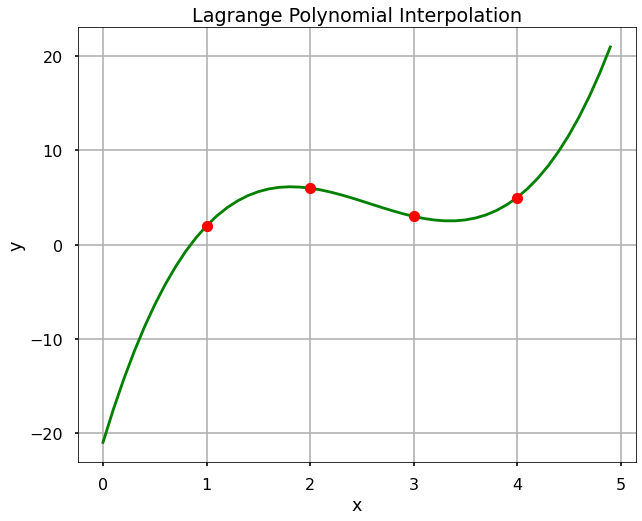

In [31]:
x = [1, 2, 3,4]
y = [2, 6, 3,5]

x_new = np.arange(0, 5, .1)

f = lagrange(x, y)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'g', x, y, 'ro')
plt.title('Lagrange Polynomial Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

17.5

In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

In [35]:
def divided_diff(x, y):

    n = len(y)
    coef = np.zeros([n, n])

    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):

    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

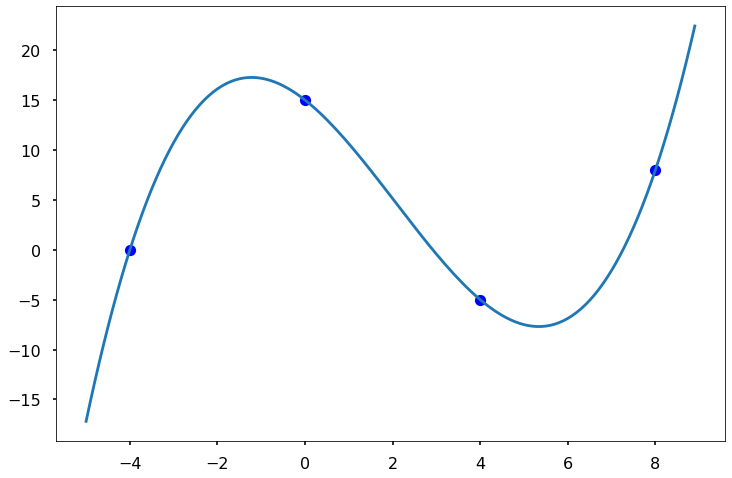

In [51]:
x = np.array([-4, 0, 4, 8])
y = np.array([0, 15, -5, 8])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 9, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)